In [72]:
import TurbPy as tb
from TurbPy.imports import *

In [73]:
# deck = 'KH_Lv1di/'
# deck = 'KH_new/'
deck = 'KH_400ppc_200wci2/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx_de = info['Lx/de']
ly_de = info['Ly/de']

lx_di = info['Lx/di']
ly_di = info['Ly/di']

nx = int(info['nx'])
ny = int(info['ny'])

lxr_di = np.linspace(0, lx_di, nx)
lyr_di = np.linspace(0, ly_di, ny)

In [74]:
# t = 5295
# ds = tb.load_vars(dirs, t, 'electron')

t = times[250]
ds = tb.load_vars(dirs, t, 'electron')

In [75]:
dbx = ds['cbx'] - np.mean(ds['cbx'])
dby = ds['cby'] - np.mean(ds['cby'])
dbz = ds['cbz'] - np.mean(ds['cbz'])

dex = ds['ex'] - np.mean(ds['ex'])
dey = ds['ey'] - np.mean(ds['ey'])
dez = ds['ez'] - np.mean(ds['ez'])

In [76]:
def flip2D(var):
  var_flip = np.flip(var, axis = 0)
  var_flip = np.flip(var_flip, axis = 1)
  var_per = np.concatenate((var, var_flip))
  return var_per

In [77]:
dsi = tb.load_vars(dirs, t, 'ion')
jz_per = flip2D(ds['jz'] + dsi['jz'])
jx = (ds['jx'] + dsi['jx'])
jy = (ds['jy'] + dsi['jy'])
jz = (ds['jz'] + dsi['jz'])
j = np.sqrt(jx**2 + jy**2 + jz**2)
j_per = flip2D(j)

In [78]:
dbx_flip = np.flip(dbx, axis = 0)
dbx_per = np.concatenate((dbx, dbx_flip))

dby_flip = np.flip(dby, axis = 0)
dby_per = np.concatenate((dby, dby_flip))

dbz_flip = np.flip(dbz, axis = 0)
dbz_per = np.concatenate((dbz, dbz_flip))


dex_flip = np.flip(dex, axis = 0)
dex_per = np.concatenate((dex, dex_flip))

dey_flip = np.flip(dey, axis = 0)
dey_per = np.concatenate((dey, dey_flip))

dez_flip = np.flip(dez, axis = 0)
dez_per = np.concatenate((dez, dez_flip))

dsi = tb.load_vars(dirs, t, 'ion')

# jz_flip = np.flip(ds['jz'] + dsi['jz'], axis = 0)
# jz_per = np.concatenate((ds['jz'] + dsi['jz'], jz_flip))

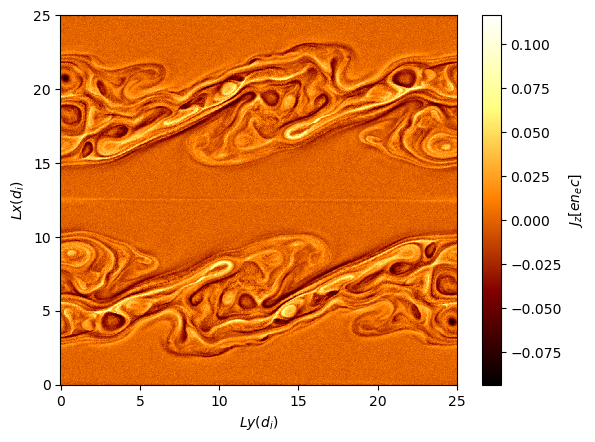

In [79]:
plt.pcolormesh(lyr_di, lyr_di, jz_per, cmap = 'afmhot')
plt.colorbar(label = r'$J_z \left[ e n_e c\right]$')
plt.ylabel(r'$Lx (d_i)$')
plt.xlabel(r'$Ly (d_i)$')
plt.savefig(figs + f'Jzp_{t}.jpg', dpi = 400)

In [80]:
# k, fft = tb.EnSpec2D(dbx, dby,  numbins = 10 * nx, lx = lx, ly = ly)
# k, fft = tb.EnSpec2D(dex_per, dey_per, dez_per, numbins = 15 * nx, lx = lx_de, ly = lx_de)\
k, fft = tb.EbSpec2D(dbx_per, dby_per, dbz_per, lx = lx_de, ly = ly_de)

In [81]:
print(k)

[ 0.          0.10028653  0.20057307  0.3008596   0.40114613  0.50143266
  0.6017192   0.70200573  0.80229226  0.9025788   1.00286533  1.10315186
  1.2034384   1.30372493  1.40401146  1.50429799  1.60458453  1.70487106
  1.80515759  1.90544413  2.00573066  2.10601719  2.20630372  2.30659026
  2.40687679  2.50716332  2.60744986  2.70773639  2.80802292  2.90830946
  3.00859599  3.10888252  3.20916905  3.30945559  3.40974212  3.51002865
  3.61031519  3.71060172  3.81088825  3.91117479  4.01146132  4.11174785
  4.21203438  4.31232092  4.41260745  4.51289398  4.61318052  4.71346705
  4.81375358  4.91404011  5.01432665  5.11461318  5.21489971  5.31518625
  5.41547278  5.51575931  5.61604585  5.71633238  5.81661891  5.91690544
  6.01719198  6.11747851  6.21776504  6.31805158  6.41833811  6.51862464
  6.61891117  6.71919771  6.81948424  6.91977077  7.02005731  7.12034384
  7.22063037  7.32091691  7.42120344  7.52148997  7.6217765   7.72206304
  7.82234957  7.9226361   8.02292264  8.12320917  8

In [82]:
print(lx_de)
print(ly_de)

125.0
250.0


In [83]:
print(twci[250])

138.1068


In [84]:
x = np.linspace(10**(-1), 1, 100)
y = tb.powrl(x, 3 *10**(-8), a = -8/3)

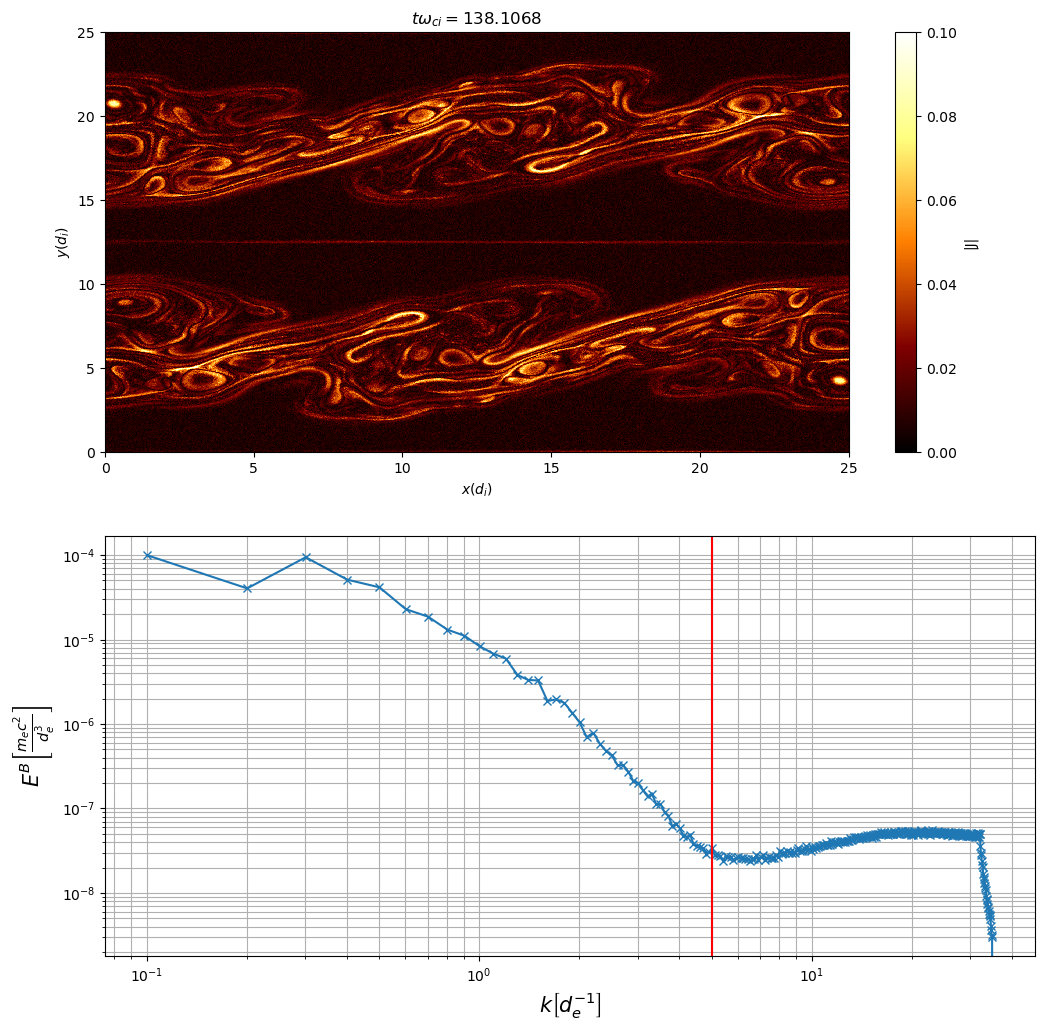

In [87]:
fig, ax1 = plt.subplots(2, 1, figsize = (12, 12))


cm1 = ax1[0].pcolormesh(lyr_di, lyr_di, j_per, cmap = 'afmhot', vmin = 0, vmax = 0.1)
ax1[0].set_xlabel(r'$x(d_i)$')
ax1[0].set_ylabel(r'$y(d_i)$')
ax1[0].set_title(r'$t \omega_{ci} = $'f'{twci[250]}')
fig.colorbar(cm1, label = '|J|')

ax1[1].loglog(k[1:], fft[1:], marker = 'x')
ax1[1].axvline(5, color = 'red')
ax1[1].set_ylabel(r'$E^B \left[ \frac{m_e c^2}{d_e^3}  \right]$', size  = 15)
ax1[1].set_xlabel(r'$k  \left[ d_e^{-1}    \right]$', size = 15)
ax1[1].grid(which = 'both')
fig.savefig(figs + f'spect_{t}.jpg', dpi = 400)